### Neural network class definition

In [84]:
import numpy as np

#import for the sigmoid function expit()
import scipy.special 

class NeuralNetwork:
    
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        # set number of nodes
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        # set learning rate
        self.lr = learningrate
        
        # link weight matrices, wih and who
        # w_i_j is the link from node i to node j in the next layer
        
        # sample the weights from a normal distribution centred around 0 and with a standard deviation that is related
        # to the inverse square of the incoming links
        
        self.wih = np.random.normal(0., pow(self.hnodes, -0.5), (self.hnodes, self.inodes))
        self.who = np.random.normal(0., pow(self.hnodes, -0.5), (self.onodes, self.hnodes))
        
        # activation function is the sigmoid function
        self.activation_function = lambda x: scipy.special.expit(x)
        self.inverse_activation_function = lambda x: scipy.special.logit(x)
        pass
    
    # train the neural network
    def train(self, inputs_list, targets_list):
        # convert the inputs_list, targets_list to 2d array
        inputs = np.array(inputs_list, ndmin = 2).T
        targets = np.array(targets_list, ndmin = 2).T
        
        # calculate the signal to the hidden layer
        hidden_inputs = np.dot(self.wih, inputs)
        
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate the signal to the output layer
        final_inputs = np.dot(self.who, hidden_outputs)
        
        # calculate the signals emerging from output layer
        final_outputs = self.activation_function(final_inputs)
        
        # output errors
        output_errors = targets - final_outputs
        
        # hidden layer error is the output errors, split by weights, recombined at hidden nodes
        hidden_errors = np.dot(self.who.T, output_errors)
        
        # update the weights for links between the hidden and output layers
        self.who += self.lr * np.dot((output_errors * final_outputs * (1.0 - final_outputs)), np.transpose(hidden_outputs))
        
        # update the weights for the links between the input and hidden layers
        self.wih += self.lr * np.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), np.transpose(inputs))
        pass
    
    # query the neural network
    def query(self, inputs_list):
        # convert the inputs_list to 2d array
        inputs = np.array(inputs_list, ndmin = 2).T
        
        # calculate the signal to the hidden layer
        hidden_inputs = np.dot(self.wih, inputs)
        
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # for the final outputs
        final_inputs = np.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs
    
    # backquery the neural network
    # we'll use the same termnimology to each item, 
    # eg target are the values at the right of the network, albeit used as input
    # eg hidden_output is the signal to the right of the middle nodes
    def backquery(self, targets_list):
        # transpose the targets list to a vertical array
        final_outputs = numpy.array(targets_list, ndmin=2).T
        
        # calculate the signal into the final output layer
        final_inputs = self.inverse_activation_function(final_outputs)

        # calculate the signal out of the hidden layer
        hidden_outputs = numpy.dot(self.who.T, final_inputs)
        # scale them back to 0.01 to .99
        hidden_outputs -= numpy.min(hidden_outputs)
        hidden_outputs /= numpy.max(hidden_outputs)
        hidden_outputs *= 0.98
        hidden_outputs += 0.01
        
        # calculate the signal into the hideen layer
        hidden_inputs = self.inverse_activation_function(hidden_outputs)
        
        # calculate the signal out of the input layer
        inputs = numpy.dot(self.wih.T, hidden_inputs)
        # scale them back to 0.01 to .99
        inputs -= numpy.min(inputs)
        inputs /= numpy.max(inputs)
        inputs *= 0.98
        inputs += 0.01
        
        return inputs

### MNIST dataset

In [85]:
data_file = open("mnist_dataset/mnist_train_100.csv", 'r')
data_list = data_file.readlines()
data_file.close()

In [86]:
import matplotlib.pyplot as plt
%matplotlib inline

#### plot one data row

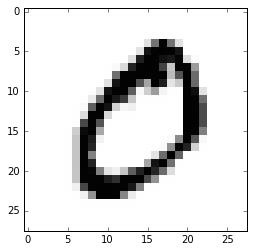

In [87]:
all_values = data_list[1].split(',')

# asfarray to convert text strings to numbers
image_array = np.asfarray(all_values[1:]).reshape((28,28))
plt.imshow(image_array, cmap='Greys', interpolation = 'None')


### Prepare data for training

In [88]:
# scale input to be in (0.01, 0.99)
scaled_input = np.asfarray(all_values[1:])/255.0 * 0.99 + 0.01
print scaled_input[0:100]

[ 0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01
  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01
  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01
  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01
  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01
  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01
  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01
  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01
  0.01  0.01  0.01  0.01]


In [89]:
# output nodes
onodes = 10
targets = np.zeros(onodes) + 0.01
targets[int(all_values[0])] = 0.99


### Create and train the neural network

In [109]:
# create the neural network
input_nodes = 784
hidden_nodes = 100
ouput_nodes = 10

learning_rate = 0.3

n = NeuralNetwork(input_nodes, hidden_nodes, ouput_nodes, learning_rate)

# load training data
training_data_file = open("mnist_dataset/mnist_train.csv", 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

In [110]:
# train the neural network
for record in training_data_list:
    all_values = record.split(',')
    
    # scale and shift the inputs
    inputs = np.asfarray(all_values[1:])/255.0 * 0.99 + 0.01
    
    # create target output values (0.01 execept 0.99 at the position of the number represented by the image)
    targets = np.zeros(ouput_nodes) + 0.01
    targets[int(all_values[0])] = 0.99
    
    # train
    n.train(inputs, targets)
    pass

### Test the network

In [112]:
test_data_file = open("mnist_dataset/mnist_test.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

4


array([[  4.08740042e-03],
       [  4.38510622e-03],
       [  4.06831169e-03],
       [  1.99148191e-03],
       [  9.47231987e-01],
       [  4.66280117e-04],
       [  5.21294482e-03],
       [  6.64350181e-03],
       [  5.69049703e-03],
       [  4.40480798e-02]])

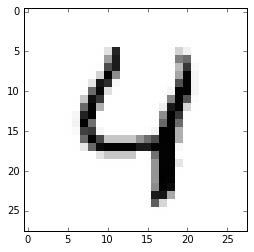

In [113]:
# get the first test record
all_values_test = test_data_list[4].split(',')
scaled_input_test = np.asfarray(all_values_test[1:])/255.0 * 0.99 + 0.01
print all_values_test[0]

image_array = np.asfarray(all_values_test[1:]).reshape((28,28))
plt.imshow(image_array, cmap='Greys', interpolation = 'None')

n.query(scaled_input_test)

In [114]:
# test the neural network

# scorecard for how well the network performs, initially empty
scorecard = []

# go through all the records in the test data set
for record in test_data_list:
    # split the record by the ',' commas
    all_values = record.split(',')
    # correct answer is first value
    correct_label = int(all_values[0])
    # scale and shift the inputs
    inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    # query the network
    outputs = n.query(inputs)
    # the index of the highest value corresponds to the label
    label = np.argmax(outputs)
    # append correct or incorrect to list
    if (label == correct_label):
        # network's answer matches correct answer, add 1 to scorecard
        scorecard.append(1)
    else:
        # network's answer doesn't match correct answer, add 0 to scorecard
        scorecard.append(0)
        pass
    pass


In [115]:
# calculate the performance score, the fraction of correct answers
scorecard_array = np.asarray(scorecard)
print ("performance = {0:2f}").format(scorecard_array.sum()*1.0 / scorecard_array.size)

performance = 0.950700


In [ ]:
# run the network backwards, given a label, see what image it produces

# label to test
label = 0
# create the output signals for this label
targets = numpy.zeros(output_nodes) + 0.01
# all_values[0] is the target label for this record
targets[label] = 0.99
print(targets)

# get image data
image_data = n.backquery(targets)

# plot image data
matplotlib.pyplot.imshow(image_data.reshape(28,28), cmap='Greys', interpolation='None')